<a href="https://colab.research.google.com/github/GerganaTancheva123/test/blob/master/meret_ac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing

In [ ]:
import requests
import csv
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data access

In [ ]:
responce_nodes = requests.get('https://meter.ac/gs/metadata/nodes.csv')

In [ ]:
if responce_nodes.status_code != 200:
    print("Status code ",responce_nodes.status_code)
data_nodes = responce_nodes.content.decode('utf-8')

In [ ]:
responce_nodes.headers

{'Date': 'Fri, 30 Sep 2022 10:46:08 GMT', 'Server': 'Apache/2.4.54 (FreeBSD) OpenSSL/1.1.1q mod_fcgid/2.3.9', 'X-Frame-Options': 'SAMEORIGIN', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=63072000', 'Last-Modified': 'Fri, 30 Sep 2022 09:59:00 GMT', 'Accept-Ranges': 'bytes', 'Content-Length': '31686', 'Access-Control-Allow-Origin': '*', 'Vary': 'User-Agent', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/csv'}

In [ ]:
print(type(data_nodes))

<class 'str'>


In [ ]:
meta_data = list(csv.reader(data_nodes.splitlines(), delimiter=','))
content = meta_data[1:]

In [ ]:
content

[['N01',
  'Plovdiv_NE',
  '167',
  '42.16219064527371',
  '24.76723507046699',
  'https://kade.si/#map=19/2757075.43/5185307.27/0',
  '5',
  'node',
  'MS8607',
  'MS8607',
  'MS8607',
  'HPMA115S0-XXX',
  'SMB-20',
  '5'],
 ['N03',
  'Dospat',
  '1270',
  '41.65137879078779',
  '24.157715141773224',
  'https://kade.si/#map=19/2689224.55/5108899.89/0',
  '0',
  'node',
  'MS8607',
  'MS8607',
  'MS8607',
  'HPMA115S0-XXX',
  'SMB-20',
  '5'],
 ['N06',
  'Plovdiv_FC',
  '170.8',
  '42.13749858243574',
  '24.75116327404976',
  'https://kade.si/#map=19/2755286.53/5181600.08/0',
  '8.9',
  'node',
  'MS8607',
  'MS8607',
  'MS8607',
  'HPMA115S0-XXX',
  'SMB-20',
  '5'],
 ['N08',
  'Kuklen',
  '308',
  '42.035498445995245',
  '24.781319350004196',
  'https://kade.si/#map=19/2758643.92/5166300.15/0',
  '3',
  'node',
  'MS8607',
  'MS8607',
  'MS8607',
  'HPMA115S0-XXX',
  'SMB-20',
  '5'],
 ['N09',
  'Plovdiv_E',
  '182.0',
  '42.150672062925736',
  '24.787670820951465',
  'https://kade.s

In [ ]:
nodes = []
location = []

flag = True
for row in range(len(content)):
    for col in range(len(content[row])-12):
        if flag == True:
            nodes.append(content[row][col])
            flag = False
        else:
            location.append(content[row][col])
            flag = True

In [ ]:
nodes_repo = dict(zip(location, nodes))

In [ ]:
nodes_repo

{'Plovdiv_NE': 'N01',
 'Dospat': 'N03',
 'Plovdiv_FC': 'N06',
 'Kuklen': 'N08',
 'Plovdiv_E': 'N09',
 'Krumovo': 'N10',
 'Plovdiv_Trakia': 'N11',
 'Markovo': 'N13',
 'test_indoors': 'N16',
 'Osenets': 'N18',
 'Glozhene': 'N20',
 'Yarlovo': 'N21',
 'Mirkovo': 'N22',
 'Troyan': 'N25',
 'Varvara': 'N29',
 'Gabrovo': 'N30',
 'Velingrad': 'N32',
 'Rudartsi': 'N33',
 'Elhovo': 'N34',
 'Plovdiv_NW': 'N35',
 'Samokov': 'N36',
 'Mosomishte': 'N37',
 'Veliko_Tarnovo': 'N38',
 'Sarnegor': 'N40',
 'Panagyurski_kolonii': 'N41',
 'Sofia_Ilinden': 'N42',
 'Sofia_Hladilnika': 'N43',
 'Sofia_Yavorov': 'N44',
 'Hayredin': 'N45',
 'Muselievo': 'N47',
 'Bansko': 'N48',
 'Sofia_Mladost': 'N049',
 'Gladno_pole': 'N050',
 'Breznik': 'N051',
 'Tryavna': 'N052',
 'Petrohan': 'N053',
 'Elena': 'N055',
 'Pletena': 'N058',
 'Relyovo': 'N059',
 'Dobri_dol': 'N060',
 'Samuilovo': 'N061',
 'Krastatitsa': 'N063',
 'Selishte': 'N064',
 'Smolyan': 'N065',
 'Ruse': 'N066',
 'Medeni_polyani': 'N067',
 'Plana_Earth_Statio

In [ ]:
select_location = widgets.Dropdown(
    options = location,
    def_value = '',
    description = 'Select location',
    disabled=False,
    width="100%"
)
display(select_location)

Dropdown(description='Select location', options=('Plovdiv_NE', 'Dospat', 'Plovdiv_FC', 'Kuklen', 'Plovdiv_E', …

In [ ]:
print(nodes_repo[select_location.value])

N01


In [ ]:
responce = requests.get(f"https://meter.ac/gs/nodes/{nodes_repo[select_location.value]}/daily.txt")
#  https://meter.ac/gs/nodes/{nodes_repo[choose_location.value]}/history.csv

In [ ]:
if responce.status_code != 200:
    print("Status code ",responce.status_code)
data = responce.content.decode('utf-8')

In [ ]:
responce.headers

{'Date': 'Fri, 30 Sep 2022 10:47:43 GMT', 'Server': 'Apache/2.4.54 (FreeBSD) OpenSSL/1.1.1q mod_fcgid/2.3.9', 'X-Frame-Options': 'SAMEORIGIN', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Strict-Transport-Security': 'max-age=63072000', 'Last-Modified': 'Sun, 25 Sep 2022 21:01:03 GMT', 'Accept-Ranges': 'bytes', 'Vary': 'Accept-Encoding,User-Agent', 'Content-Encoding': 'gzip', 'Access-Control-Allow-Origin': '*', 'Cache-Control': 'max-age=0, no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'Expires': 'Thu, 1 Jan 1970 00:00:00 GMT', 'Content-Length': '14192', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/plain'}

In [ ]:
data_new = list(csv.reader(data.splitlines(), delimiter='\t'))

In [ ]:
data_new

[['01.09.2018', '24.6', '971', '44', '19', '26', '26.4'],
 ['02.09.2018', '29.4', '971', '33', '19', '25', '26.5'],
 ['03.09.2018', '25.6', '967', '44', '17', '23', '26.5'],
 ['04.09.2018', '23.9', '964', '58', '21', '28', '27.1'],
 ['05.09.2018', '20.9', '964', '68', '15', '21', '26.8'],
 ['06.09.2018', '22.1', '964', '52', '17', '23', '26.3'],
 ['07.09.2018', '23.8', '964', '47', '22', '30', '26.2'],
 ['08.09.2018', '23.5', '968', '45', '19', '26', '26.3'],
 ['09.09.2018', '23.8', '971', '44', '18', '24', '26.3'],
 ['10.09.2018', '22.1', '972', '43', '15', '20', '26.3'],
 ['11.09.2018', '22.1', '973', '40', '13', '17', '26.2'],
 ['12.09.2018', '22.0', '974', '43', '13', '18', '26.2'],
 ['13.09.2018', '20.2', '971', '59', '15', '20', '26.6'],
 ['14.09.2018', '21.7', '969', '52', '10', '14', '26.4'],
 ['15.09.2018', '22.9', '971', '45', '13', '18', '26.4'],
 ['16.09.2018', '24.1', '974', '40', '13', '18', '26.1'],
 ['17.09.2018', '21.6', '976', '54', '19', '25', '26.6'],
 ['18.09.2018'

In [ ]:
df = pd.DataFrame(data_new, columns =['date',
                                      'temperature',
                                      'dew/frost point',
                                      'atmospheric pressure',
                                      'relative humidity',
                                      'particulate matter',
                                      'background radiation'])

In [ ]:
df.head(5)

,date,temperature,dew/frost point,atmospheric pressure,relative humidity,particulate matter,background radiation
0,01.09.2018,24.6,971,44,19,26,26.4
1,02.09.2018,29.4,971,33,19,25,26.5
2,03.09.2018,25.6,967,44,17,23,26.5
3,04.09.2018,23.9,964,58,21,28,27.1
4,05.09.2018,20.9,964,68,15,21,26.8


In [ ]:
print(df.dtypes)

date                    object
temperature             object
dew/frost point         object
atmospheric pressure    object
relative humidity       object
particulate matter      object
background radiation    object
dtype: object


### Data transforming

In [ ]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True)

In [ ]:
df["temperature"] = pd.to_numeric(df["temperature"])
df["dew/frost point"] = pd.to_numeric(df["dew/frost point"])
df["atmospheric pressure"] = pd.to_numeric(df["atmospheric pressure"])
df["relative humidity"] = pd.to_numeric(df["relative humidity"])
df["particulate matter"] = pd.to_numeric(df["particulate matter"])
df["background radiation"] = pd.to_numeric(df["background radiation"])

In [ ]:
print(df.dtypes)

date                    datetime64[ns]
temperature                    float64
dew/frost point                  int64
atmospheric pressure             int64
relative humidity                int64
particulate matter               int64
background radiation           float64
dtype: object


In [ ]:
df.head(5)

,date,temperature,dew/frost point,atmospheric pressure,relative humidity,particulate matter,background radiation
0,2018-09-01,24.6,971,44,19,26,26.4
1,2018-09-02,29.4,971,33,19,25,26.5
2,2018-09-03,25.6,967,44,17,23,26.5
3,2018-09-04,23.9,964,58,21,28,27.1
4,2018-09-05,20.9,964,68,15,21,26.8


### Remove outliers
![](https://drive.google.com/uc?export=view&id=1vRWhv1Cr5X97u3MUnthCR-BHmtXL39D9)

In [ ]:
def remove_outliers(df, col_name):

    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    low  = Q1-1.5*IQR
    high = Q3+1.5*IQR

    df = df.loc[(df[col_name] >= low) & (df[col_name] <= high)]

    return df

In [ ]:
def visualize_removed_outliers(df,df2,col):
    plt.figure(figsize=(15,15))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(data = df,x = col, ax=axes[0], color='yellow').set_title("Before Outlier Removal: "+ col)

    sns.boxplot(data = df2, x = col, ax=axes[1], color='cyan').set_title("After Outlier Removal: "+col)
    plt.show()

In [ ]:
x_names = df.drop(labels=['date'], axis=1)

<Figure size 1080x1080 with 0 Axes>

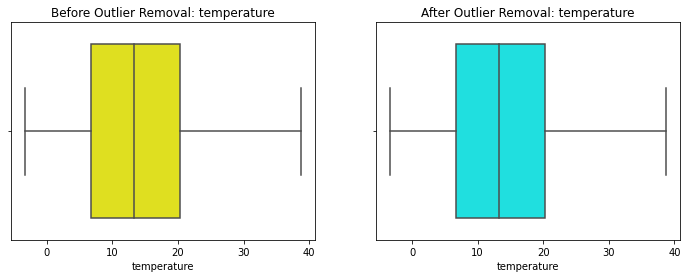

<Figure size 1080x1080 with 0 Axes>

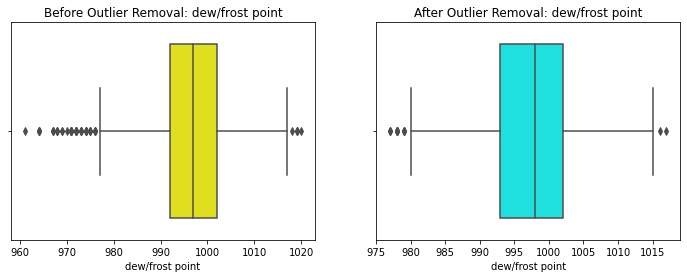

<Figure size 1080x1080 with 0 Axes>

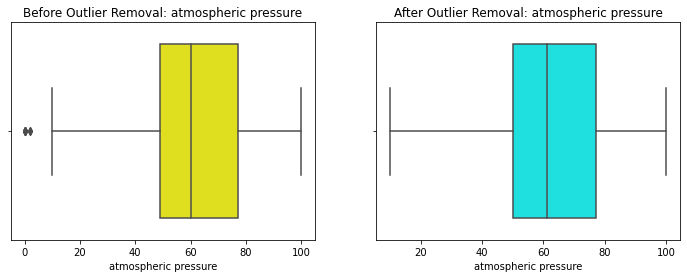

<Figure size 1080x1080 with 0 Axes>

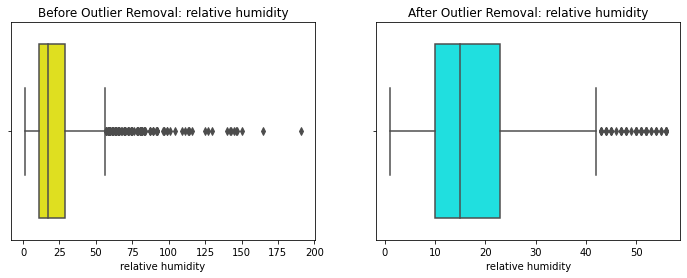

<Figure size 1080x1080 with 0 Axes>

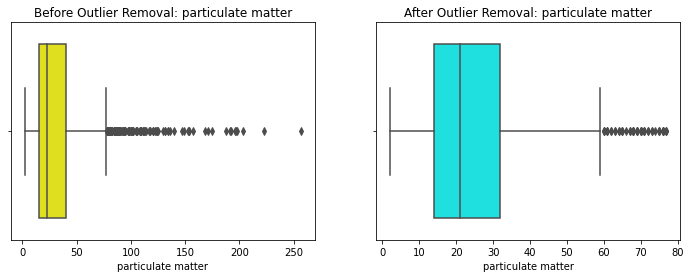

<Figure size 1080x1080 with 0 Axes>

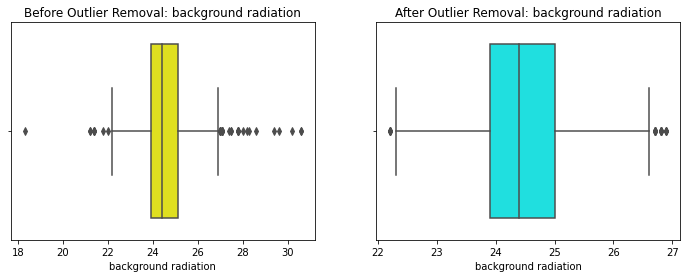

In [ ]:
for column in x_names.columns:
  df2 = remove_outliers(df, column)
  visualize_removed_outliers(df, df2, column)

### Filtrate data by chosen date interval

In [ ]:
start = widgets.DatePicker(
    description='Start Date',
    disabled=False
)
display(start)

DatePicker(value=None, description='Start Date')

In [ ]:
end = widgets.DatePicker(
    description='End Date',
    disabled=False
)
display(end)

DatePicker(value=None, description='End Date')

In [ ]:
print(start.value)
print(end.value)

2018-09-01
2022-09-28


In [ ]:
filtered_data = (df2['date'] >= str(start.value)) & (df2['date'] <= str(end.value))
df2.loc[filtered_data]

,date,temperature,dew/frost point,atmospheric pressure,relative humidity,particulate matter,background radiation
0,2018-09-01,24.6,971,44,19,26,26.4
1,2018-09-02,29.4,971,33,19,25,26.5
2,2018-09-03,25.6,967,44,17,23,26.5
4,2018-09-05,20.9,964,68,15,21,26.8
5,2018-09-06,22.1,964,52,17,23,26.3
...,...,...,...,...,...,...,...
1112,2022-09-06,18.3,1004,0,15,20,25.0
1113,2022-09-08,17.0,1001,0,10,13,25.7
1114,2022-09-09,17.1,1000,0,19,25,26.3
1115,2022-09-10,19.6,996,0,27,37,23.9


In [ ]:
df_select_desc = df2.corrwith(df['temperature']).abs()

In [ ]:
df_select_desc

temperature             1.000000
dew/frost point         0.292498
atmospheric pressure    0.472516
relative humidity       0.391145
particulate matter      0.392211
background radiation    0.019425
dtype: float64

### Linear Regression

In [ ]:
X = df2.iloc[0:,2:]
y = df2['temperature']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.40)
print(X_train.shape)
print(X_test.shape)

(647, 5)
(432, 5)


In [ ]:
model = LinearRegression().fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)
# y_pred

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-0.26919199 -0.13736571  0.50860832 -0.44024995  0.51336946]
Intercept: 280.1265247599106


In [ ]:
model_coeff_train = model.score(X_train, y_train)
model_coeff_test = model.score(X_test, y_test)
MAE = metrics.mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'Model coefficient of determination: training {model_coeff_train:.3f}')
print(f'Model coefficient of determination: testing {model_coeff_test:.3f}')
print(f'MAE: {MAE:.3f}')
print(f'RMSE: {RMSE:.3f}')

Model coefficient of determination: training 0.335
Model coefficient of determination: testing 0.345
MAE: 5.441
RMSE: 6.586


D:\Anaconda\envs\jup-env\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\envs\jup-env\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
D:\Anaconda\envs\jup-env\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Predicted')

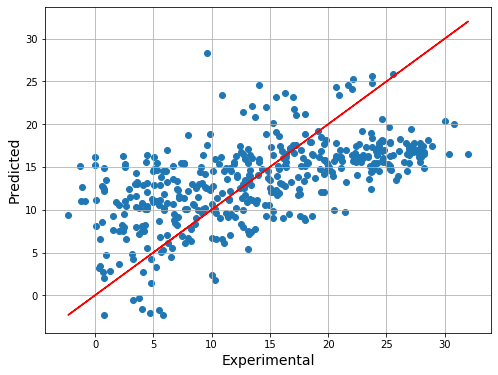

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(y_test, y_test, color = 'r', )
plt.scatter(y_test, y_pred)
plt.grid(1)
plt.xlabel('Experimental', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)